### Feature selection by fishing score and chi2(x2) Test

HIGH diamensional data in input usualy not goood for classification due to curse of the diamensionality .It significantly increases the time and space complexity for processing the data.Lets suppose you having huge dimension of your data then definetly it will take more time and more space to test and train a model moreover in presence of irrelevant and redudant features learning method tends to overfit and become less interpretable.A common way to resolve this problem is a feature selection which reduces the diamensionality by selection the subset of feature from the input feature set and it is often used to reduce the computational cost and remove irrrevant and redudant features for the problem with the high diamensional data.

One of the method in fiter method is a Fisher Score which can be calculated by doing the chi2(chi sqaure)

Fisher score and chi2 method is apply only on the categorical data.
That categorical data that has to be a finite set of the data so the basical it computes the distributions and its frequency.
Distribution and frequncy is basically define accordingly with the help of mode and median.
So the Fisher Score is one of the most widely used supervised feature selection method however it select each features independently accordinly their score and the fisher criteria which can lead suboptimal subset of the features.

In univaraint selection that the feature are been selected individualy by considering the effect of other features we may endup by selecting a suboptimal feature set.

But this is te fast and this can use for the screening purpose and as well as for educational purpose 

#### What is the Fisher Score and Chi2(x2) Test

Chi2(x2) Test :- It is a stastical hypothesis test where the sampling distribution of the stastic of the chi2 distribution and chi2 test is used to determine whether there is significant diffrence between expected frequency and observed frequency
in one or more categories thats means one or more features.It is applied only and only categorical datasets.

Chi2 test is measure the diffrences between the stochastic variable,so using this function "Weeds out" the features that are most likely to be independed of the class and therefore irrelevant for classifiaction.

That we are removing those feature which are the irrevant for the classification or not depended to the target output.

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets

from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest,SelectPercentile
from sklearn.metrics import accuracy_score

In [12]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


Since,We know that the chi2 can be use for the chatogorical data i.e.finite number avalible like Pclass,Sex,Sibsp,Parch,embarked,alive,alone.

In [13]:
#to know the null value inside the datasets.
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [14]:
#here we are going to drop the null column because we only want the data which having zero null value and categorical data.
titanic.drop(labels= ['age','deck'], axis=1,inplace=True)
#we also wanted to drop the nal value of embarked and embark_town by using the dropna
titanic = titanic.dropna()
titanic.isna().sum()
#here we can say not we dont having any null value.

survived       0
pclass         0
sex            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

In [15]:
#from above we have just taken some columns which we are going to use 
data = titanic[['pclass','sex','sibsp','parch','embarked','who','alone']].copy()

In [48]:
data.head()

,pclass,sex,sibsp,parch,embarked,who,alone
0,3,male,1,0,S,man,False
1,1,female,1,0,C,woman,False
2,3,female,0,0,S,woman,True
3,1,female,1,0,S,woman,False
4,3,male,0,0,S,man,True


In [16]:
#we had found that there is no any null values present insiside the datasets
data.isnull().sum()

pclass      0
sex         0
sibsp       0
parch       0
embarked    0
who         0
alone       0
dtype: int64

In [38]:
#we we want to convert the catogorical variable into the numerical format to make it definite.
#it can be done with the help of map function.

In [17]:
sex = { 'male':0,'female':1}
data['sex']= data['sex'].map(sex)
data.head()
#this is how had converted the male is to 0 and female is to the 1 by using the maping function.

,pclass,sex,sibsp,parch,embarked,who,alone
0,3,0,1,0,S,man,False
1,1,1,1,0,C,woman,False
2,3,1,0,0,S,woman,True
3,1,1,1,0,S,woman,False
4,3,0,0,0,S,man,True


In [ ]:
#now we want to change the categorical data into the numerical by using map function for the embarked

In [18]:
ports = {'S':0,'C':1,'Q':2}
data['embarked']=data['embarked'].map(ports)
data.head()

,pclass,sex,sibsp,parch,embarked,who,alone
0,3,0,1,0,0,man,False
1,1,1,1,0,1,woman,False
2,3,1,0,0,0,woman,True
3,1,1,1,0,0,woman,False
4,3,0,0,0,0,man,True


In [19]:
#similarly
who = {'man':0,'woman':1,'child':2}
data['who']= data['who'].map(who)
data.head()

,pclass,sex,sibsp,parch,embarked,who,alone
0,3,0,1,0,0,0,False
1,1,1,1,0,1,1,False
2,3,1,0,0,0,1,True
3,1,1,1,0,0,1,False
4,3,0,0,0,0,0,True


In [20]:
#similarly for alone
alone = {True:1,False:0}
data['alone']=data['alone'].map(alone)
data.head()

,pclass,sex,sibsp,parch,embarked,who,alone
0,3,0,1,0,0,0,0
1,1,1,1,0,1,1,0
2,3,1,0,0,0,1,1
3,1,1,1,0,0,1,0
4,3,0,0,0,0,0,1


Now,we can see that the string is converted into the format of the numerical data

### Do F- Test

In [43]:
x= data.copy()
y= titanic['survived']
x.shape,y.shape

((889, 7), (889,))

In [44]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =.2,random_state = 0)

In [46]:
#f_score given the two arrays first array represents the fisrt which having f values and second array represents the p values.
f_score = chi2(x_train,y_train)
f_score
#here we are looking for the p values which are less than 0.05 

(array([ 22.65169202, 152.91534343,   0.52934285,  10.35663782,
         16.13255653, 161.42431175,  13.4382363 ]),
 array([1.94189138e-06, 3.99737147e-35, 4.66883271e-01, 1.29009955e-03,
        5.90599986e-05, 5.52664700e-37, 2.46547298e-04]))

In [47]:
p_values = pd.Series(f_score[1],index= x_train.columns)
p_values.sort_values(ascending = True,inplace = True)

In [48]:
#here,we having the p_values in ascending formate and here we having the who and sex are the very lowest that means they are 
#important
p_values

who         5.526647e-37
sex         3.997371e-35
pclass      1.941891e-06
embarked    5.906000e-05
alone       2.465473e-04
parch       1.290100e-03
sibsp       4.668833e-01
dtype: float64

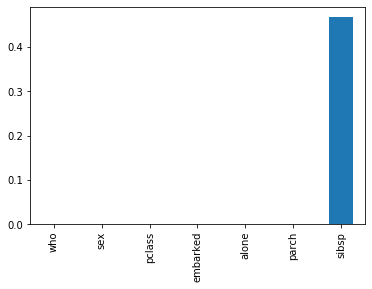

In [49]:
p_values.plot.bar()

In [52]:
x_train_2  = x_train[['who','sex']]
x_test_2   = x_test[['who','sex']]

In [55]:
def run_randomForest(x_train,x_test,y_train,y_test):
    clf= RandomForestClassifier(random_state=0,n_estimators=100,n_jobs=-1)
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    print('Accuracy :',accuracy_score(y_test,y_pred))

In [56]:
%%time
run_randomForest(x_train_2,x_test_2,y_train,y_test)

Accuracy : 0.7191011235955056
Wall time: 745 ms


In [ ]:
#by using the 2 column we had got the 71% accuracy 

In [58]:
x_train_4 = x_train[['who','sex','pclass','embarked']]
x_test_4  = x_test[['who','sex','pclass','embarked']]

In [59]:
def randomforest(x_train,x_test,y_train,y_test):
    clf = RandomForestClassifier(random_state=0,n_estimators=100,n_jobs=-1)
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    print('Accuracy :',accuracy_score(y_test,y_pred))

In [60]:
%%time
randomforest(x_train_4,x_test_4,y_train,y_test)

Accuracy : 0.7584269662921348
Wall time: 608 ms


In [ ]:
#this is how we can get the accuracy by using the randomforest model.